Number of training samples: 4457
Number of testing samples: 1115
Accuracy: 96.68%
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



<Figure size 400x400 with 0 Axes>

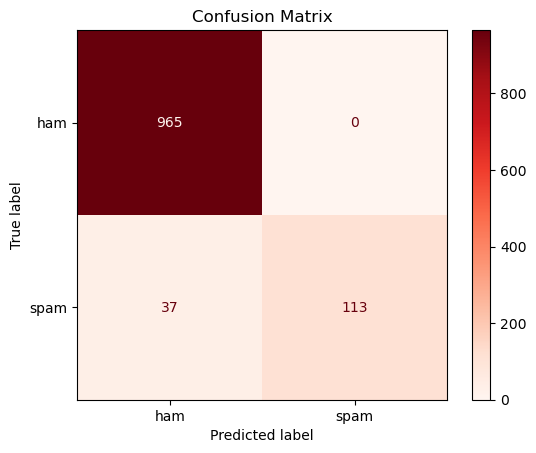

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset with a different encoding
data = pd.read_csv(r"C:\Users\HP\Downloads\dataset\spam.csv", encoding='latin-1')

# Preprocessing
data = data.rename(columns={'v1': 'label', 'v2': 'message'})
data['label'] = data['label'].map({'spam': 1, 'ham': 0})

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)

# Check the lengths of the training and testing sets
print("Number of training samples:", len(X_train))
print("Number of testing samples:", len(X_test))

# Convert text data to numerical data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
# Calculate accuracy as a percentage
accuracy = accuracy_score(y_test, y_pred) * 100

# Print the accuracy in a formatted string
print(f"Accuracy: {accuracy:.2f}%")

# Print classification report
print(classification_report(y_test, y_pred))


# Set figure size and color map
plt.figure(figsize=(4, 4))  
conf_matrix.plot(cmap='Reds', values_format='d')  
# Add title and show the plot
plt.title('Confusion Matrix')
plt.show()
